# Detección de fraudes

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Descripción del dataset

Una plataforma de ventas online nos contrata para que realicemos un modelo que nos
permita detectar un posible fraude dada cierta operación para ello contamos con un dataset
que contiene las siguientes columnas:

- Step: representa una unidad de tiempo donde 1 step equivale a 1 hora
- type: tipo de transacción en línea
- amount: el importe de la transacción
- nameOrig: cliente que inicia la transacción
- oldbalanceOrg: saldo antes de la transacción
- newbalanceOrig: saldo después de la transacción
- nameDest: destinatario de la transacción
- oldbalanceDest: saldo inicial del destinatario antes de la transacción
- newbalanceDest: el nuevo saldo del destinatario después de la transacción
- isFraud: transacción fraudulenta

In [2]:
# Leemos el dataset
df = pd.read_csv('data/PS_20174392719_1491204439457_log.csv')

In [3]:
# Visualizamos los primeros 5 registros
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Visualizamos la forma del dataset
df.shape

(6362620, 11)

In [5]:
# Obtenemos los estadísticos más importantes del dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
# Obtenemos la cantidad de datos nulos por variable
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:ylabel='isFraud'>

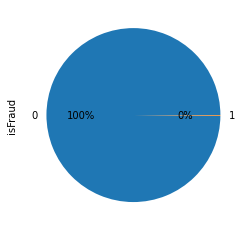

In [7]:
# Distribución de la variable de salida
df.isFraud.value_counts().plot.pie(autopct='%1.0f%%', figsize=(4,4))

In [8]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64